In [439]:
import pandas as pd
import yaml
df = pd.read_csv(r'..\Day1\ML-Project\data\raw\healthcare-dataset-stroke-data.csv')

In [440]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.linear_model import LogisticRegression

## EDA

In [441]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [442]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Fill NA values

In [443]:
average_bmi = df['bmi'].mean()

df["bmi"] = df["bmi"].fillna(average_bmi)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


## Preparing the data

In [444]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [445]:
df = df[df['gender'] != 'Other']

In [446]:
df = df.drop("id", axis=1)

## Using mapping for tranform object columns in numerical 

In [447]:
df["work_type"] = df["work_type"].map({"Private": 4, "Self-employed": 3, "Govt_job": 2, "children": 1, "Never_worked": 0})
df["smoking_status"] = df["smoking_status"].map({"smokes": 3, "Unknown": 2, "formerly smoked": 1, "never smoked": 0})
df['ever_married'] = df['ever_married'].map({'Yes':0,'No':1})
df['gender'] = df['gender'].map({'Male':0,'Female':1})
df['Residence_type'] = df['Residence_type'].map({'Urban':0,'Rural':1})
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,4,0,228.69,36.600000,1,1
1,1,61.0,0,0,0,3,1,202.21,28.893237,0,1
2,0,80.0,0,1,0,4,1,105.92,32.500000,0,1
3,1,49.0,0,0,0,4,0,171.23,34.400000,3,1
4,1,79.0,1,0,0,3,1,174.12,24.000000,0,1


## check numerical values for outliers

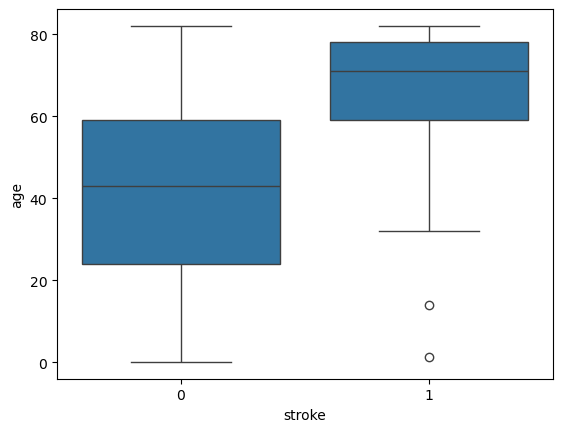

In [448]:
sns.boxplot(x = 'stroke', y = 'age', data = df)
plt.show()

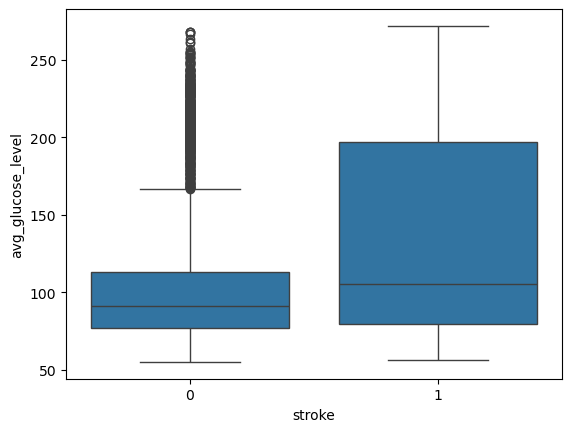

In [449]:
sns.boxplot(x = 'stroke', y = 'avg_glucose_level', data = df)
plt.show()

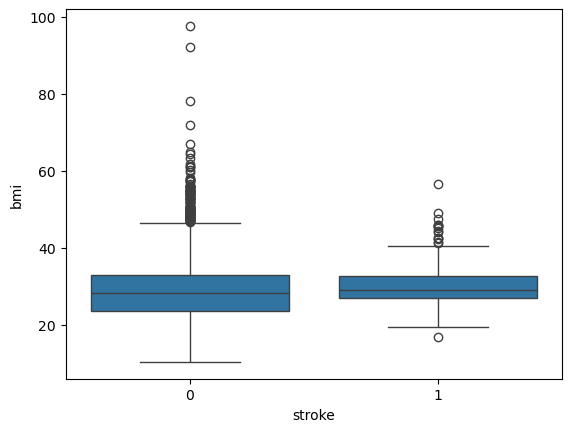

In [450]:
sns.boxplot(x = 'stroke', y = 'bmi', data = df)
plt.show()

## Remove outliers for age, only for stroke = 1

In [451]:
category_to_clean = 1
subset = df[df['stroke'] == category_to_clean]

Q1 = subset['age'].quantile(0.25)
Q3 = subset['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cleaned_subset = subset[(subset['age'] >= lower_bound) & (subset['age'] <= upper_bound)]

df_cleaned = pd.concat([df[df['stroke'] != category_to_clean], cleaned_subset], ignore_index=True)

## Remove outliers for bmi

In [452]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 6 * IQR

df_cleaned = df_cleaned[(df_cleaned['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]

C:\Users\User\AppData\Local\Temp\ipykernel_10736\367808915.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[(df_cleaned['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]


## Check numerical values for distribution

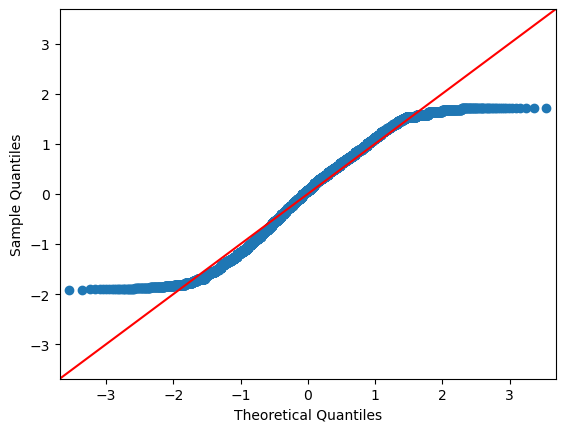

In [453]:
import statsmodels.api as sm
sm.qqplot(df_cleaned['age'].values, fit=True, line='45')
plt.show()

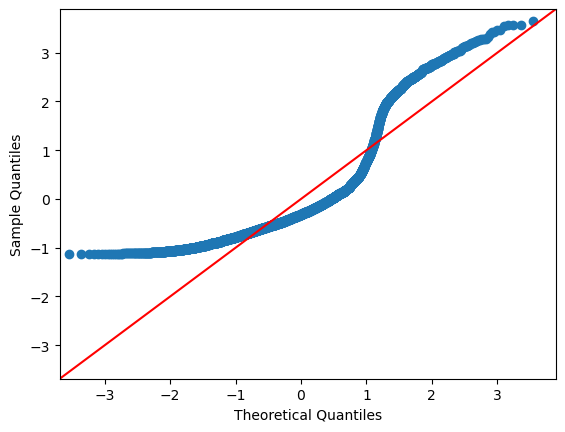

In [454]:
sm.qqplot(df_cleaned['avg_glucose_level'].values, fit=True, line='45')
plt.show()

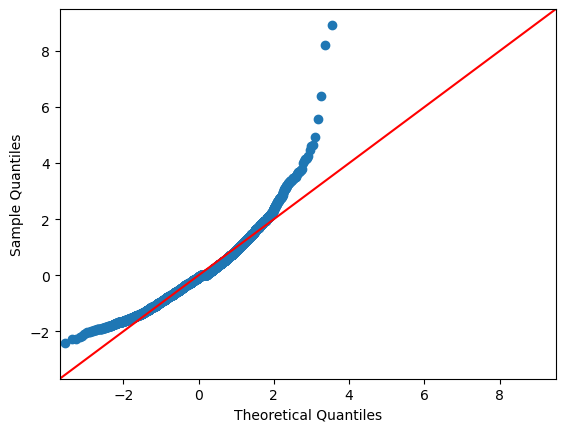

In [455]:
sm.qqplot(df_cleaned['bmi'].values, fit=True, line='45')
plt.show()

## Creating df with numerical columns

In [420]:
df_num = df.select_dtypes(include=['number'])

## Correlation plot

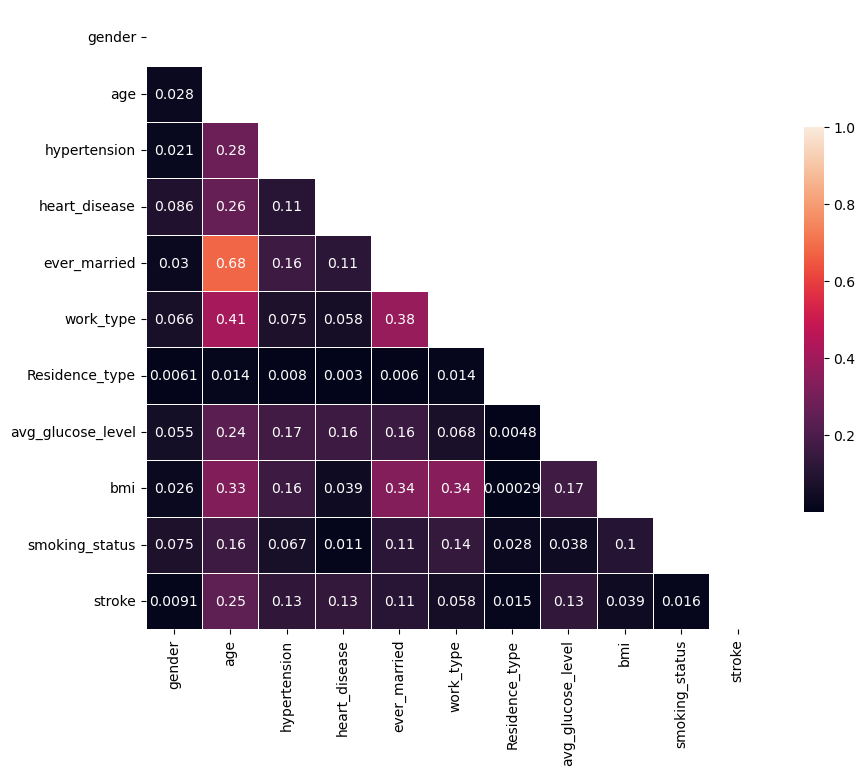

In [217]:
corr=np.abs(df_num.corr()) # corr(x,y) = corr(y, x), corr(x,x) = 1

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

## Train Test Split

In [218]:
features = df.drop(columns = ["stroke"])
target = df["stroke"]

In [219]:
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.20, random_state=0)

In [220]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1547,0,59.0,0,1,0,3,1,194.98,30.4,2
4976,1,18.0,0,0,1,4,0,101.95,46.0,1
246,1,75.0,0,0,0,3,1,78.80,29.3,1
2824,1,41.0,0,0,0,4,1,97.41,25.5,0
3799,1,40.0,0,0,0,4,1,92.35,38.0,0
...,...,...,...,...,...,...,...,...,...,...
4932,0,28.0,1,0,1,4,0,86.61,38.6,3
3265,0,61.0,0,0,0,3,1,81.96,29.9,0
1653,0,44.0,0,0,0,4,1,94.71,28.4,3
2607,0,21.0,0,0,1,4,0,120.94,29.7,1


In [221]:
X_test.shape

(1022, 10)

In [222]:
y_train

1547    0
4976    0
246     1
2824    0
3799    0
       ..
4932    0
3265    0
1653    0
2607    0
2732    0
Name: stroke, Length: 4087, dtype: int64

## DF number 

In [223]:
X_test_num  = X_test.select_dtypes(include=['number'])
X_test_num

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
42,0,82.0,0,1,0,4,0,144.90,26.400000,3
380,0,4.0,0,0,1,1,1,106.22,16.700000,2
1559,1,53.0,0,0,0,4,1,72.63,66.800000,2
352,1,20.0,0,0,1,4,1,96.57,34.100000,0
3639,1,51.0,1,0,0,4,1,85.84,31.800000,0
...,...,...,...,...,...,...,...,...,...,...
3577,1,20.0,0,0,1,4,0,98.55,21.300000,0
660,0,52.0,0,0,1,4,1,69.37,36.200000,2
57,0,78.0,0,0,0,4,0,237.75,28.893237,1
4267,0,36.0,0,0,0,4,1,119.90,37.600000,0


In [224]:
X_train_num  = X_train.select_dtypes(include=['number'])
X_train_num.shape

(4087, 10)

## # Apply a power transform featurewise to make avg_glucose_level and bmi more Gaussian-like

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [422]:
pt.fit(X_train_num)

X_train_trans = pt.transform(X_train_num)
X_test_trans = pt.transform(X_test_num)

In [423]:
X_train_trans = pd.DataFrame(X_train_trans, columns=X_train_num.columns, index=X_train_num.index )
X_train_trans

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1547,-1.206702,0.696293,-0.323872,4.152774,-0.717122,-0.464271,1.030058,1.643300,0.336943,0.775738
4976,0.828705,-1.115038,-0.323872,-0.240803,1.394462,0.814817,-0.970819,0.286994,1.919872,-0.012795
246,0.828705,1.349562,-0.323872,-0.240803,-0.717122,-0.464271,1.030058,-0.573811,0.195331,-0.012795
2824,0.828705,-0.067452,-0.323872,-0.240803,-0.717122,0.814817,1.030058,0.151458,-0.339250,-1.186329
3799,0.828705,-0.111020,-0.323872,-0.240803,-0.717122,0.814817,1.030058,-0.015875,1.191877,-1.186329
...,...,...,...,...,...,...,...,...,...,...
4932,-1.206702,-0.646138,3.087637,-0.240803,1.394462,0.814817,-0.970819,-0.230217,1.251721,1.386533
3265,-1.206702,0.779104,-0.323872,-0.240803,-0.717122,-0.464271,1.030058,-0.426644,0.273233,-1.186329
1653,-1.206702,0.062445,-0.323872,-0.240803,-0.717122,0.814817,1.030058,0.064470,0.075377,1.386533
2607,-1.206702,-0.971545,-0.323872,-0.240803,1.394462,0.814817,-0.970819,0.740215,0.247444,-0.012795


In [424]:
X_test_trans = pd.DataFrame(X_test_trans, columns=X_test_num.columns, index=X_test_num.index )

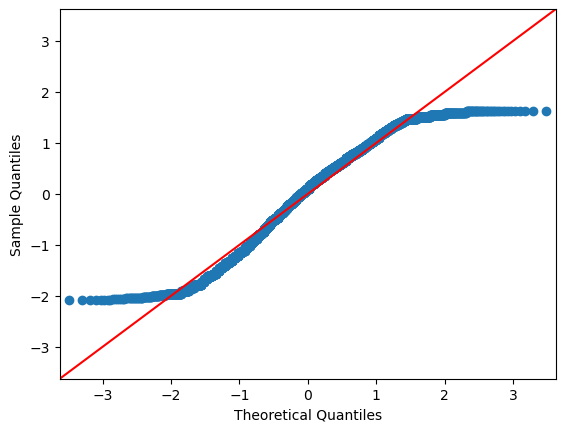

In [425]:
sm.qqplot(X_train_trans['age'].values, fit=True, line='45')
plt.show()

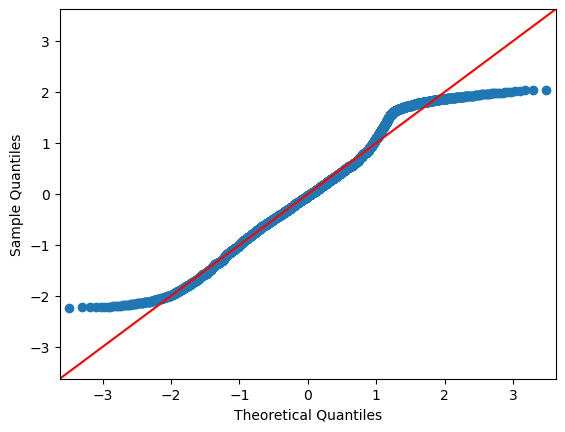

In [426]:
sm.qqplot(X_train_trans['avg_glucose_level'].values, fit=True, line='45')
plt.show()

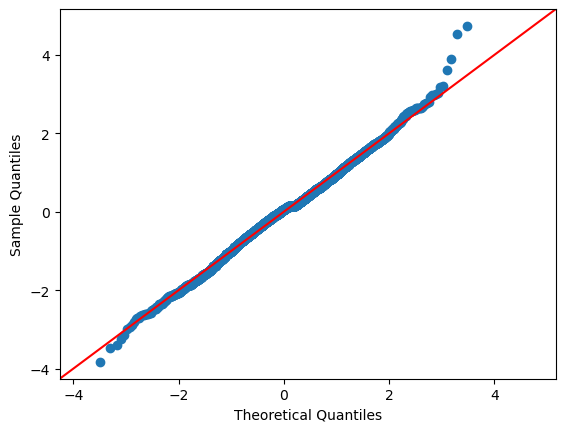

In [427]:
sm.qqplot(X_train_trans['bmi'].values, fit=True, line='45')
plt.show()

## Identify correlations

In [429]:
X_train_corr = pd.concat([X_train_trans, y_train], axis=1)

>## ANOVA test

In [430]:
import scipy.stats as st

df_stroke = X_train_corr[X_train_corr["stroke"] == 1][["age", "avg_glucose_level", "bmi"]]
df_no_stroke = X_train_corr[X_train_corr["stroke"] == 0][["age", "avg_glucose_level", "bmi"]]

#Set the hypothesis

#H0: df_stroke = df_no_stroke
#H1: df_stroke != df_no_stroke

alpha = 0.05

st.f_oneway(df_stroke, df_no_stroke)

F_onewayResult(statistic=array([258.18529908,  31.68246305,   9.22470246]), pvalue=array([2.20700013e-56, 1.93733523e-08, 2.40279615e-03]))

In [431]:
y_train_df = pd.DataFrame(y_train)

## There is no statistically significant association between gender and stroke.

> Chi test for target and categorical

In [432]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(X_train['gender'], y_train_df['stroke'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-squared Statistic: 0.8320078430557135
P-value: 0.3616925821134256
Degrees of Freedom: 1
Expected Frequencies:
[[1584.60680206   79.39319794]
 [2307.39319794  115.60680206]]


>## There is no statistically significant association between residence type and stroke.

In [433]:
contingency_table = pd.crosstab(X_train['Residence_type'], y_train_df['stroke'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-squared Statistic: 0.8057583869135991
P-value: 0.36937726385110436
Degrees of Freedom: 1
Expected Frequencies:
[[2003.61340837  100.38659163]
 [1888.38659163   94.61340837]]


## Re doing Train test slip

In [457]:
df = df.drop(columns = ["gender"])

In [458]:
df = df.drop(columns = ["Residence_type"])

In [459]:
df.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,0,4,228.69,36.600000,1,1
1,61.0,0,0,0,3,202.21,28.893237,0,1
2,80.0,0,1,0,4,105.92,32.500000,0,1
3,49.0,0,0,0,4,171.23,34.400000,3,1
4,79.0,1,0,0,3,174.12,24.000000,0,1


In [460]:
features = df.drop(columns = ["stroke"])
target = df["stroke"]

In [461]:
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.20, random_state=0)

## KNN classifier

In [467]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [468]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [469]:
print(f"The R2 of the model on the TEST set is: {knn.score(X_test, y_test): .2f}")

The R2 of the model on the TEST set is:  0.95


## Normalize Stand. 

In [478]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled_np = scaler.transform(X_train)
X_test_scaled_np  = scaler.transform(X_test)

X_train_standarized = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)
X_test_standarized  = pd.DataFrame(X_test_scaled_np, columns=X_test.columns, index=X_test.index)

knn.fit(X_train_standarized, y_train)

y_train_pred = knn.predict(X_train_standarized)
y_test_pred = knn.predict(X_test_standarized)



In [500]:
X_test_standarized

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status
42,1.706713,-0.323872,4.152774,-0.717122,0.749944,0.848760,-0.314165,1.592481
380,-1.748469,-0.323872,-0.240803,1.394462,-1.937886,-0.001162,-1.569044,0.691280
1559,0.422094,-0.323872,-0.240803,-0.717122,0.749944,-0.739241,4.912339,0.691280
352,-1.039714,-0.323872,-0.240803,1.394462,0.749944,-0.213203,0.681975,-1.111120
3639,0.333500,3.087637,-0.240803,-0.717122,0.749944,-0.448975,0.384427,-1.111120
...,...,...,...,...,...,...,...,...
3577,-1.039714,-0.323872,-0.240803,1.394462,0.749944,-0.169696,-0.973947,-1.111120
660,0.377797,-0.323872,-0.240803,1.394462,0.749944,-0.810873,0.953650,0.691280
57,1.529524,-0.323872,-0.240803,-0.717122,0.749944,2.888969,0.008382,-0.209920
4267,-0.330959,-0.323872,-0.240803,-0.717122,0.749944,0.299431,1.134767,-1.111120


> New KNN Test

In [479]:
knn.fit(X_train_standarized, y_train)

KNeighborsClassifier(n_neighbors=10)

In [480]:
pred = knn.predict(X_test_standarized)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [481]:
y_test.values

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [482]:
print(f"The accuracy of the model is {knn.score(X_test_standarized, y_test)*100: .2f}%")

The accuracy of the model is  94.62%


## Avaluate metrics. Accuracy, recall, f1-score.

In [483]:
from sklearn.metrics import classification_report
target_names = ['Stroke 0','Stroke 1']
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

    Stroke 0       0.95      1.00      0.97       968
    Stroke 1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



## Log regression 

In [378]:
log_reg = LogisticRegression()
log_reg.fit(X_train_standarized, y_train)

LogisticRegression()

In [379]:
y_pred_test_log = log_reg.predict(X_test_standarized)
print(classification_report(y_pred = y_pred_test_log, y_true = y_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       1.00      0.02      0.04        54

    accuracy                           0.95      1022
   macro avg       0.97      0.51      0.50      1022
weighted avg       0.95      0.95      0.92      1022



## Ramdom Forest Classifier

In [303]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(class_weight='balanced')
clf.fit(X_train_num, y_train)

RandomForestClassifier(class_weight='balanced')

In [304]:
pred_clf = clf.predict(X_test_num)
pred_clf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [305]:
y_test.values

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [306]:
print(f"The accuracy of the model is {clf.score(X_test_num, y_test)*100: .2f}%")

The accuracy of the model is  94.72%


In [307]:
from sklearn.metrics import classification_report
target_names = ['Stroke 0','Stroke 1']
print(classification_report(y_test, pred_clf, target_names=target_names))

              precision    recall  f1-score   support

    Stroke 0       0.95      1.00      0.97       968
    Stroke 1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Ajusting treshhold = 0.3

In [308]:
probabilities = clf.predict_proba(X_test_num)[:, 1]
new_threshold = 0.3 
new_predictions = (probabilities >= new_threshold).astype(int)

In [309]:
from sklearn.metrics import classification_report
print(classification_report(y_test, new_predictions, target_names=target_names))

              precision    recall  f1-score   support

    Stroke 0       0.95      0.98      0.97       968
    Stroke 1       0.17      0.06      0.08        54

    accuracy                           0.94      1022
   macro avg       0.56      0.52      0.52      1022
weighted avg       0.91      0.94      0.92      1022



## Ajusting treshhold = 0.15

In [310]:
probabilities = clf.predict_proba(X_test_num)[:, 1]
new_threshold1 = 0.15
new_predictions1 = (probabilities >= new_threshold1).astype(int)
print(classification_report(y_test, new_predictions1, target_names=target_names))

              precision    recall  f1-score   support

    Stroke 0       0.96      0.92      0.94       968
    Stroke 1       0.16      0.26      0.20        54

    accuracy                           0.89      1022
   macro avg       0.56      0.59      0.57      1022
weighted avg       0.91      0.89      0.90      1022



## Decision Tree

In [484]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [485]:
tree = DecisionTreeClassifier(max_depth=10)

In [486]:
tree.fit(X_train_standarized, y_train)

DecisionTreeClassifier(max_depth=10)

In [487]:
y_pred_test_dt = tree.predict(X_test_standarized)

print(f"MAE, {mean_absolute_error(y_pred_test_dt, y_test): .2f}")
print(f"MSE, {mean_squared_error(y_pred_test_dt, y_test): .2f}")
print(f"RMSE, {root_mean_squared_error(y_pred_test_dt, y_test): .2f}")
print(f"R2 score, {tree.score(X_test_standarized, y_test): .2f}")

MAE,  0.07
MSE,  0.07
RMSE,  0.27
R2 score,  0.93


In [488]:
tree_importance = {feature : importance for feature, importance in zip(X_train_standarized.columns, tree.feature_importances_)}
tree_importance

{'age': 0.22330198915531305,
 'hypertension': 0.020672244762764212,
 'heart_disease': 0.010116583534689428,
 'ever_married': 0.02655671109144055,
 'work_type': 0.04891454218551529,
 'avg_glucose_level': 0.3122296762791745,
 'bmi': 0.2920912015479694,
 'smoking_status': 0.06611705144313354}

In [407]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz

tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X_train_norm_df, y_train)


dot_data = export_graphviz(tree, out_file="tree.dot", filled=True, rounded=True, feature_names=X_train_norm_df.columns)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
from sklearn.tree import export_text

tree_viz = export_text(tree, feature_names=list(X_train_standarized.columns))
print(tree_viz)

## Accuracy of the model:

In [ ]:
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred_test_dt): .2f}")

## Confusion matrix:

In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test_dt))

## ROC AUC

In [ ]:
from sklearn.metrics import roc_auc_score
y_pred_proba = tree.predict_proba(X_test_standarized)[:, 1]
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba): .2f}")

## Ajust parameters

In [337]:
train_scores = []
test_scores = []

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i )

    knn.fit(X_train_num, y_train)

    train_scores.append(knn.score(X_train_num, y_train))

    test_scores.append(knn.score(X_test_num, y_test))

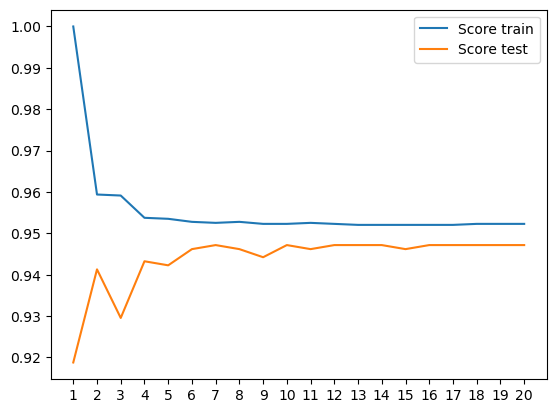

In [339]:
plt.plot(neighbors, train_scores, label='Score train')
plt.plot(neighbors, test_scores, label='Score test')
plt.xticks(np.arange(1,21,1))
plt.legend();

In [340]:
print(f'max score on Test KNN : {max(test_scores)*100:.2f}%')

max score on Test KNN : 94.72%


## SMOTE

In [341]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [525]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [526]:
X_train_sm, y_train_sm =  sm.fit_resample(X_train_standarized,y_train)

> Log Reg model

In [527]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [528]:
y_pred_test_log = log_reg.predict(X_test_standarized)
print(classification_report(y_pred = y_pred_test_log, y_true = y_test))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86       968
           1       0.14      0.70      0.24        54

    accuracy                           0.76      1022
   macro avg       0.56      0.74      0.55      1022
weighted avg       0.93      0.76      0.83      1022



> KNN model

In [529]:
knn.fit(X_train_sm, y_train_sm)

KNeighborsClassifier(n_neighbors=10)

In [530]:
pred = knn.predict(X_test_standarized)

In [531]:
print(f"The accuracy of the model is {knn.score(X_test_standarized, y_test)*100: .2f}%")

The accuracy of the model is  80.53%


In [532]:
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

    Stroke 0       0.97      0.82      0.89       968
    Stroke 1       0.14      0.50      0.21        54

    accuracy                           0.81      1022
   macro avg       0.55      0.66      0.55      1022
weighted avg       0.92      0.81      0.85      1022



## Presentation (graphics)

In [346]:
results_stroke = {
    "Model": ["Random Forest", "KNN", " SMOTE"],
    "Accuracy": [0.89, 0.95, 0.77],
    "Precision (Stroke 1)": [0.95, 0.95, 0.98],
    "Recall (Stroke 1)": [0.92, 1.00, 0.78],
    "F1-score (Stroke 1)": [0.94, 0.97, 0.87]
}

df_results = pd.DataFrame(results_stroke)

In [347]:
results_stroke_no = {
    "Model": ["Random Forest", "KNN", "SMOTE"],
    "Accuracy": [0.89, 0.95, 0.77],
    "Precision (Stroke 0)": [0.13, 0.00, 0.15],
    "Recall (Stroke 0)": [0.20, 0.00, 0.69],
    "F1-score (Stroke 0)": [0.16, 0.00, 0.24]
}

df_results_no = pd.DataFrame(results_stroke_no)

In [348]:
df_results

,Model,Accuracy,Precision (Stroke 1),Recall (Stroke 1),F1-score (Stroke 1)
0,Random Forest,0.89,0.95,0.92,0.94
1,KNN,0.95,0.95,1.00,0.97
2,SMOTE,0.77,0.98,0.78,0.87


In [349]:
df_results_no

,Model,Accuracy,Precision (Stroke 0),Recall (Stroke 0),F1-score (Stroke 0)
0,Random Forest,0.89,0.13,0.20,0.16
1,KNN,0.95,0.00,0.00,0.00
2,SMOTE,0.77,0.15,0.69,0.24


## Oversamplig

In [501]:
train_over = pd.DataFrame(X_train_standarized, columns=X_train.columns, index=X_train.index)


In [502]:
train_over["strocke"] = y_train.values

In [503]:
strocke_yes = train_over[train_over["strocke"] == 1]
strocke_no = train_over[train_over["strocke"] == 0]

In [504]:
len(strocke_yes),len(strocke_no)

(195, 3892)

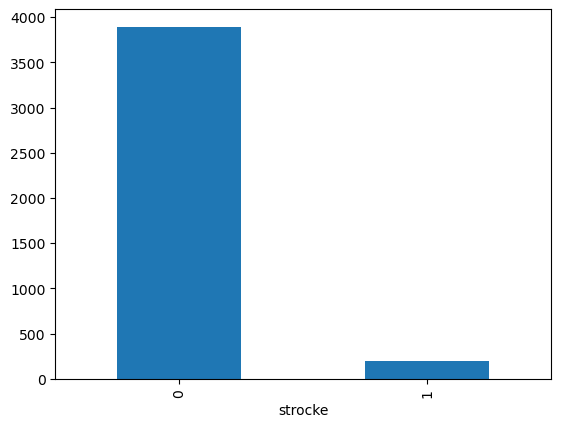

In [505]:
strockes = train_over["strocke"].value_counts()
strockes.plot(kind="bar")
plt.show()

In [506]:
from sklearn.utils import resample
yes_oversampled = resample(strocke_yes,
                                    replace=True,
                                    n_samples = len(strocke_no),
                                    random_state=0)

In [507]:
train_over = pd.concat([yes_oversampled, strocke_no])


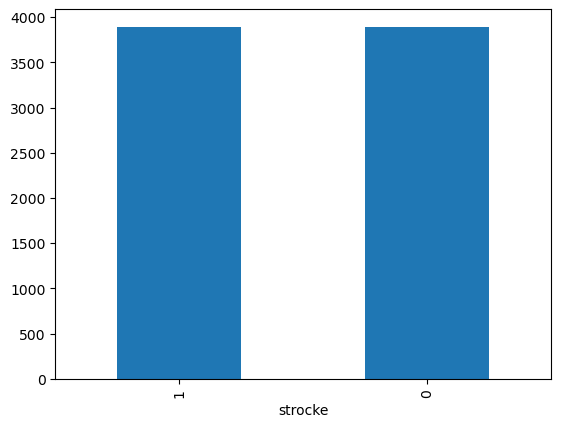

In [508]:
strockes = train_over["strocke"].value_counts()
strockes.plot(kind="bar")
plt.show()

In [509]:
X_train_over = train_over.drop(columns = ["strocke"])
y_train_over = train_over["strocke"]

> Log reg model

In [510]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [511]:
y_pred_test_log = log_reg.predict(X_test_standarized)
print(classification_report(y_pred = y_pred_test_log, y_true = y_test))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85       968
           1       0.14      0.72      0.24        54

    accuracy                           0.75      1022
   macro avg       0.56      0.74      0.54      1022
weighted avg       0.94      0.75      0.82      1022



> KNN model

In [512]:
knn.fit(X_train_over, y_train_over)

KNeighborsClassifier(n_neighbors=10)

In [513]:
pred = knn.predict(X_test_standarized)
pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [514]:
print(f"The accuracy of the model is {knn.score(X_test_standarized, y_test)*100: .2f}%")

The accuracy of the model is  81.12%


In [515]:
from sklearn.metrics import classification_report
target_names = ['Stroke 0','Stroke 1']
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

    Stroke 0       0.96      0.84      0.89       968
    Stroke 1       0.11      0.37      0.17        54

    accuracy                           0.81      1022
   macro avg       0.54      0.60      0.53      1022
weighted avg       0.91      0.81      0.86      1022



> Decision tree over model

In [533]:
tree = DecisionTreeClassifier(max_depth=10)

In [534]:
tree.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=10)

In [535]:
y_pred_test_dt = tree.predict(X_test_standarized)

print(f"MAE, {mean_absolute_error(y_pred_test_dt, y_test): .2f}")
print(f"MSE, {mean_squared_error(y_pred_test_dt, y_test): .2f}")
print(f"RMSE, {root_mean_squared_error(y_pred_test_dt, y_test): .2f}")
print(f"R2 score, {tree.score(X_test_standarized, y_test): .2f}")

MAE,  0.18
MSE,  0.18
RMSE,  0.43
R2 score,  0.82


In [536]:
tree_importance = {feature : importance for feature, importance in zip(X_train_over.columns, tree.feature_importances_)}
tree_importance

{'age': 0.5865990884458833,
 'hypertension': 0.0006495071658105942,
 'heart_disease': 0.015385471907503483,
 'ever_married': 0.004900449695389794,
 'work_type': 0.035116117179345756,
 'avg_glucose_level': 0.17457278478722485,
 'bmi': 0.149967373600261,
 'smoking_status': 0.03280920721858135}

In [541]:
target_names = ['Stroke 0','Stroke 1']
print(classification_report(y_test, y_pred_test_dt, target_names=target_names))

              precision    recall  f1-score   support

    Stroke 0       0.97      0.83      0.90       968
    Stroke 1       0.15      0.52      0.23        54

    accuracy                           0.82      1022
   macro avg       0.56      0.68      0.56      1022
weighted avg       0.93      0.82      0.86      1022



## Undersamplig

In [516]:
no_undersampled = resample(strocke_no,
                                    replace=False,
                                    n_samples = len(strocke_yes),
                                    random_state=0)

In [517]:
train_under = pd.concat([no_undersampled, strocke_yes])

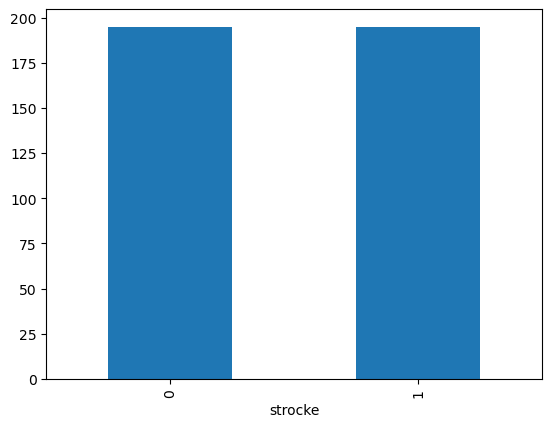

In [518]:
strockes = train_under["strocke"].value_counts()
strockes.plot(kind="bar")
plt.show()

In [519]:
X_train_under = train_under.drop(columns = ["strocke"])
y_train_under = train_under["strocke"]

> Log reg model

In [520]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [521]:
y_pred_test_log = log_reg.predict(X_test_standarized)
print(classification_report(y_pred = y_pred_test_log, y_true = y_test))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84       968
           1       0.14      0.76      0.23        54

    accuracy                           0.74      1022
   macro avg       0.56      0.75      0.54      1022
weighted avg       0.94      0.74      0.81      1022



> KNN model

In [522]:
knn.fit(X_train_under, y_train_under)

KNeighborsClassifier(n_neighbors=10)

In [523]:
pred = knn.predict(X_test_standarized)
pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [524]:
target_names = ['Stroke 0','Stroke 1']
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

    Stroke 0       0.98      0.70      0.82       968
    Stroke 1       0.13      0.78      0.22        54

    accuracy                           0.70      1022
   macro avg       0.55      0.74      0.52      1022
weighted avg       0.94      0.70      0.78      1022



## Graphics Imbalanced methods

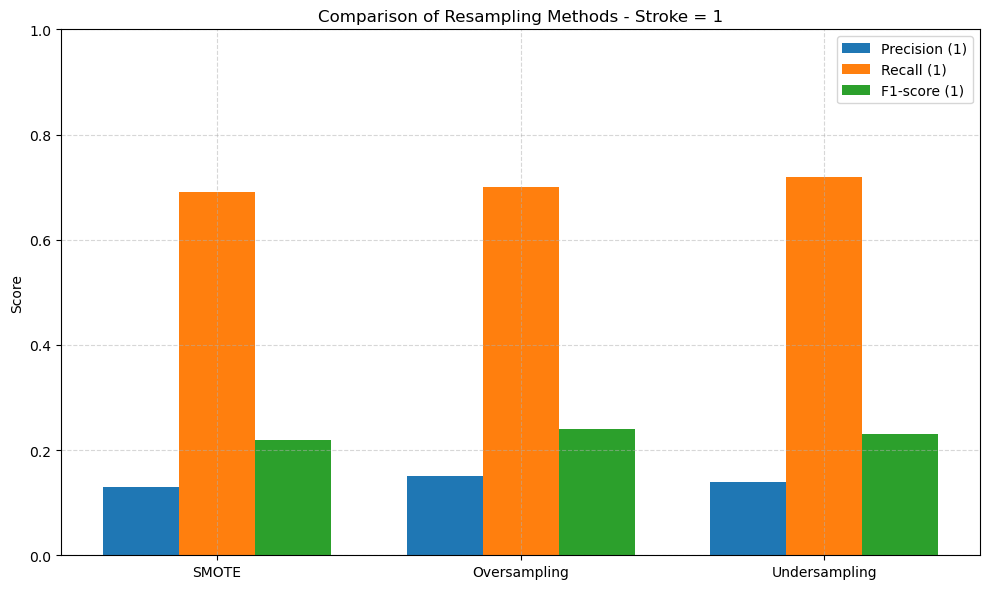

In [371]:
methods = ['SMOTE', 'Oversampling', 'Undersampling']
precision = [0.13, 0.15, 0.14]
recall = [0.69, 0.70, 0.72]
f1 = [0.22, 0.24, 0.23]

x = np.arange(len(methods))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, precision, width, label='Precision (1)')
plt.bar(x, recall, width, label='Recall (1)')
plt.bar(x + width, f1, width, label='F1-score (1)')

plt.ylabel('Score')
plt.title('Comparison of Resampling Methods - Stroke = 1')
plt.xticks(x, methods)
plt.ylim(0, 1)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

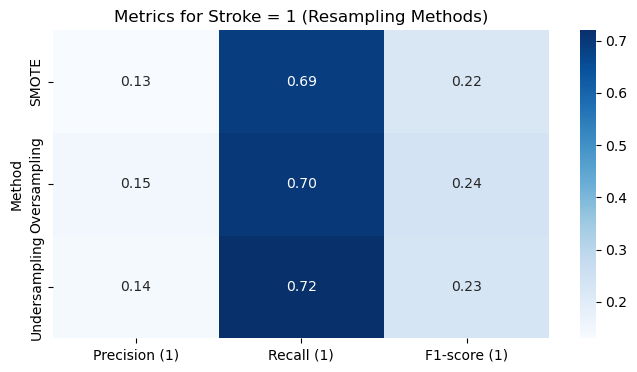

In [373]:


df_metrics = pd.DataFrame({
    'Method': ['SMOTE', 'Oversampling', 'Undersampling'],
    'Precision (1)': precision,
    'Recall (1)': recall,
    'F1-score (1)': f1
})

df_metrics.set_index('Method', inplace=True)

plt.figure(figsize=(8,4))
sns.heatmap(df_metrics, annot=True, cmap='Blues', fmt=".2f")
plt.title("Metrics for Stroke = 1 (Resampling Methods)")
plt.show()

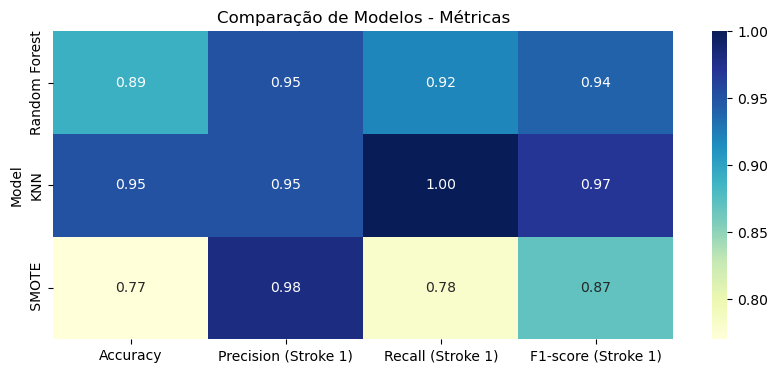

In [374]:
plt.figure(figsize=(10, 4))
sns.heatmap(df_results.set_index("Model"), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Comparação de Modelos - Métricas")
plt.show()

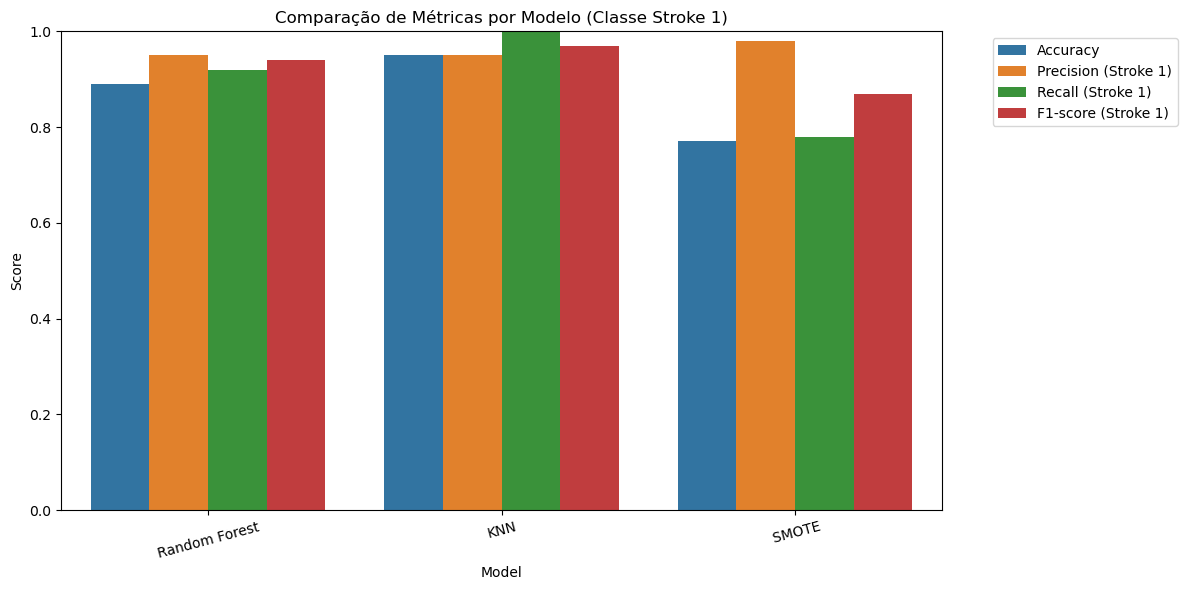

In [375]:
# Plot
df_melted = df_results.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric")
plt.title("Comparação de Métricas por Modelo (Classe Stroke 1)")
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

## Graphics KNN vs Log reg

> KNN 

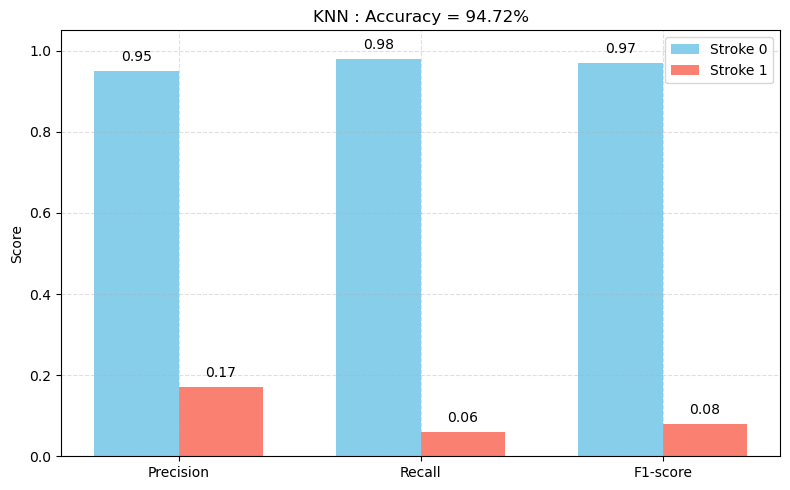

In [390]:
labels = ['Precision', 'Recall', 'F1-score']
stroke_0 = [0.95, 0.98, 0.97]
stroke_1 = [0.17, 0.06, 0.08]

x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, stroke_0, width, label='Stroke 0', color='skyblue')
bars2 = ax.bar(x + width/2, stroke_1, width, label='Stroke 1', color='salmon')

ax.set_ylabel('Score')
ax.set_title('KNN : Accuracy = 94.72%')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.05)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.4)

for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

> Log reg

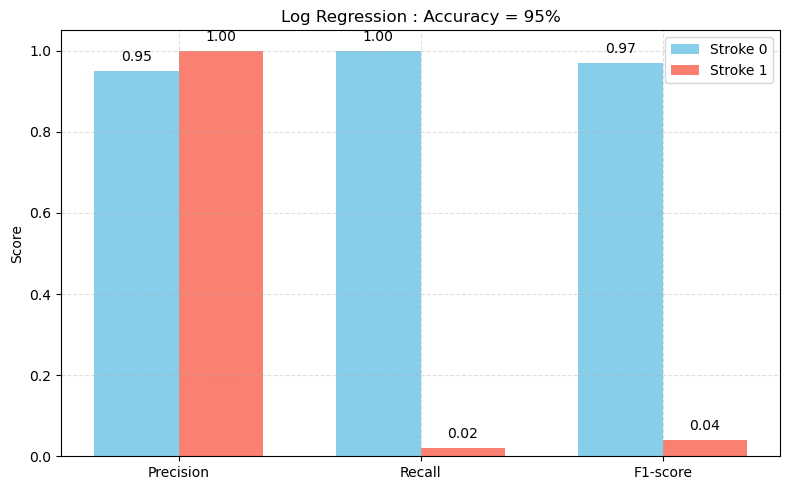

In [388]:
labels = ['Precision', 'Recall', 'F1-score']
stroke_0 = [0.95, 1.00, 0.97]
stroke_1 = [1.00, 0.02, 0.04]

x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, stroke_0, width, label='Stroke 0', color='skyblue')
bars2 = ax.bar(x + width/2, stroke_1, width, label='Stroke 1', color='salmon')

ax.set_ylabel('Score')
ax.set_title('Log Regression : Accuracy = 95%')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.05)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.4)

for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Imbalance Graphs

> SMOTE Log Reg

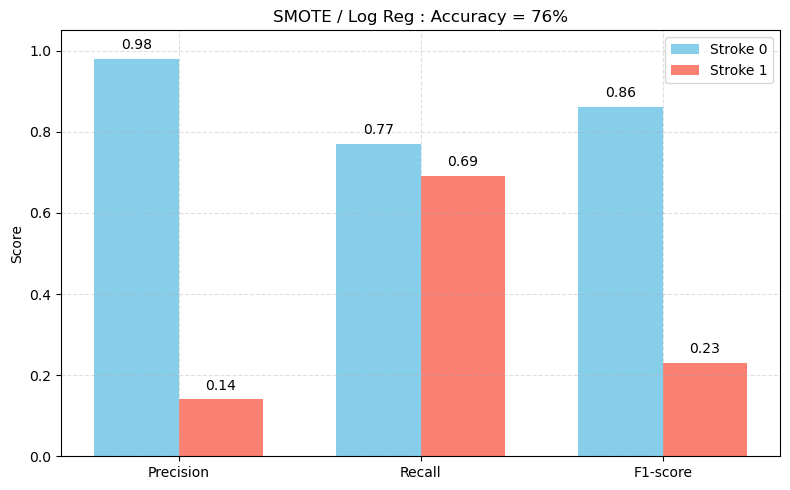

In [393]:
labels = ['Precision', 'Recall', 'F1-score']
stroke_0 = [0.98, 0.77, 0.86]
stroke_1 = [0.14, 0.69, 0.23]

x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, stroke_0, width, label='Stroke 0', color='skyblue')
bars2 = ax.bar(x + width/2, stroke_1, width, label='Stroke 1', color='salmon')

ax.set_ylabel('Score')
ax.set_title('SMOTE / Log Reg : Accuracy = 76%')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.05)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.4)

for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

> SMOTE KNN

In [ ]:
labels = ['Precision', 'Recall', 'F1-score']
stroke_0 = [0.98, 0.77, 0.86]
stroke_1 = [0.14, 0.69, 0.23]

x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, stroke_0, width, label='Stroke 0', color='skyblue')
bars2 = ax.bar(x + width/2, stroke_1, width, label='Stroke 1', color='salmon')

ax.set_ylabel('Score')
ax.set_title('SMOTE / KNN : Accuracy = 76%')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.05)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.4)

for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Importing Hyperparameters libreries

In [543]:
import optuna
import optuna.visualization as vis
import time

import scipy.stats as st

from sklearn.datasets import  fetch_california_housing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error, make_scorer

from sklearn.model_selection import cross_val_score

## Grid Search

In [547]:
parameter_grid = {"max_depth": [10, 50],
                  "min_samples_split": [4, 16],
                  "max_leaf_nodes": [250, 100],
                  "max_features": ["sqrt", "log2"]}

dt = DecisionTreeClassifier(random_state=123)

confidence_level = 0.95 
folds = 10

gs = GridSearchCV(dt, param_grid=parameter_grid, cv=folds, verbose=10) 

start_time = time.time()
gs.fit(X_train_over, y_train_over)
end_time = time.time()

print("\n")
print(f"Time taken to find the best combination of hyperparameters among the given ones: {end_time - start_time: .4f} seconds")
print("\n")


print(f"The best combination of hyperparameters has been: {gs.best_params_}")
print(f"The R2 is: {gs.best_score_: .4f}")

results_gs_df = pd.DataFrame(gs.cv_results_).sort_values(by="mean_test_score", ascending=False)

gs_mean_score = results_gs_df.iloc[0,-3]
gs_sem = results_gs_df.iloc[0,-2] / np.sqrt(folds) 

gs_tc = st.t.ppf(1-((1-confidence_level)/2), df=folds-1)
gs_lower_bound = gs_mean_score - ( gs_tc * gs_sem )
gs_upper_bound = gs_mean_score + ( gs_tc * gs_sem )

print(f"The R2 confidence interval for the best combination of hyperparameters is: \({gs_lower_bound: .4f}, {gs_mean_score: .4f}, {gs_upper_bound: .4f}) ")

best_model = gs.best_estimator_

y_pred_train_df = best_model.predict(X_train_over)
y_pred_test_df  = best_model.predict(X_test_standarized)

print("\n")
print(f"Test MAE: {mean_absolute_error(y_pred_test_df, y_test): .4f}")
print(f"Test MSE: {mean_squared_error(y_pred_test_df, y_test): .4f}")
print(f"Test RMSE: {root_mean_squared_error(y_pred_test_df, y_test): .4f}")
print(f"Test R2 score:  {best_model.score(X_test_standarized, y_test): .4f}")
print("\n")

<>:39: SyntaxWarning: invalid escape sequence '\('
<>:39: SyntaxWarning: invalid escape sequence '\('
C:\Users\User\AppData\Local\Temp\ipykernel_10736\4002661393.py:39: SyntaxWarning: invalid escape sequence '\('
  print(f"The R2 confidence interval for the best combination of hyperparameters is: \({gs_lower_bound: .4f}, {gs_mean_score: .4f}, {gs_upper_bound: .4f}) ")


Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV 1/10; 1/16] START max_depth=10, max_features=sqrt, max_leaf_nodes=250, min_samples_split=4
[CV 1/10; 1/16] END max_depth=10, max_features=sqrt, max_leaf_nodes=250, min_samples_split=4;, score=0.872 total time=   0.2s
[CV 2/10; 1/16] START max_depth=10, max_features=sqrt, max_leaf_nodes=250, min_samples_split=4
[CV 2/10; 1/16] END max_depth=10, max_features=sqrt, max_leaf_nodes=250, min_samples_split=4;, score=0.890 total time=   0.0s
[CV 3/10; 1/16] START max_depth=10, max_features=sqrt, max_leaf_nodes=250, min_samples_split=4
[CV 3/10; 1/16] END max_depth=10, max_features=sqrt, max_leaf_nodes=250, min_samples_split=4;, score=0.859 total time=   0.0s
[CV 4/10; 1/16] START max_depth=10, max_features=sqrt, max_leaf_nodes=250, min_samples_split=4
[CV 4/10; 1/16] END max_depth=10, max_features=sqrt, max_leaf_nodes=250, min_samples_split=4;, score=0.869 total time=   0.0s
[CV 5/10; 1/16] START max_depth=10, max_features=sqrt

## Random Search

In [548]:
parameter_grid = {"max_leaf_nodes": [int(x) for x in np.linspace(start = 5, stop = 30, num = 3)],
        "max_depth":[int(x) for x in np.linspace(1, 11, num = 3)]}

dt = DecisionTreeClassifier(random_state=123)

rs = RandomizedSearchCV(dt, param_distributions = parameter_grid, n_iter = 16, cv = folds, verbose=10, random_state=123)

start_time = time.time()
rs.fit(X_train_over, y_train_over)
end_time = time.time()

print("\n")
print(f"Time taken to find the best combination of hyperparameters among the given ones: {end_time - start_time: .4f} seconds")
print("\n")


print(f"The best combination of hyperparameters has been: {rs.best_params_}")
print(f"The R2 is: {rs.best_score_: .4f}")

results_rs_df = pd.DataFrame(rs.cv_results_).sort_values(by="mean_test_score", ascending=False)

rs_mean_score = results_rs_df.iloc[0,-3]
rs_sem = results_rs_df.iloc[0,-2] / np.sqrt(10)

rs_tc = st.t.ppf(1-((1-confidence_level)/2), df=folds-1)
rs_lower_bound = rs_mean_score - ( rs_tc * gs_sem )
rs_upper_bound = rs_mean_score + ( rs_tc * gs_sem )

print(f"The R2 confidence interval for the best combination of hyperparameters is: \
    ({rs_lower_bound: .4f}, {rs_mean_score: .4f}, {rs_upper_bound: .4f}) ")


best_model = rs.best_estimator_

y_pred_test_df = best_model.predict(X_test_standarized)
y_pred_test_df = best_model.predict(X_test_standarized)


print("\n")
print(f"Test MAE: {mean_absolute_error(y_pred_test_df, y_test): .4f}")
print(f"Test MSE: {mean_squared_error(y_pred_test_df, y_test): .4f}")
print(f"Test RMSE: {root_mean_squared_error(y_pred_test_df, y_test): .4f}")
print(f"Test R2 score:  {best_model.score(X_test_standarized, y_test): .4f}")
print("\n")

C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=16. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10; 1/9] START max_depth=1, max_leaf_nodes=5..............................
[CV 1/10; 1/9] END max_depth=1, max_leaf_nodes=5;, score=0.769 total time=   0.0s
[CV 2/10; 1/9] START max_depth=1, max_leaf_nodes=5..............................
[CV 2/10; 1/9] END max_depth=1, max_leaf_nodes=5;, score=0.769 total time=   0.0s
[CV 3/10; 1/9] START max_depth=1, max_leaf_nodes=5..............................
[CV 3/10; 1/9] END max_depth=1, max_leaf_nodes=5;, score=0.755 total time=   0.0s
[CV 4/10; 1/9] START max_depth=1, max_leaf_nodes=5..............................
[CV 4/10; 1/9] END max_depth=1, max_leaf_nodes=5;, score=0.759 total time=   0.0s
[CV 5/10; 1/9] START max_depth=1, max_leaf_nodes=5..............................
[CV 5/10; 1/9] END max_depth=1, max_leaf_nodes=5;, score=0.789 total time=   0.0s
[CV 6/10; 1/9] START max_depth=1, max_leaf_nodes=5..............................
[CV 6/10; 1/9] END max_depth=1, max_leaf_no